# Desviación estándar y Ángulos

In [247]:
import numpy as np 

In [248]:
x = np.array([1,-2,3,2])

In [249]:
np.mean(x)

1.0

In [250]:
x_t = x - np.mean(x)*np.array([1,1,1,1])
x_t

array([ 0., -3.,  2.,  1.])

In [251]:
np.mean(x_t)

0.0

In [252]:
np.linalg.norm(x_t)/np.sqrt(x_t.size)

1.8708286933869707

In [253]:
np.std(x)

1.8708286933869707

## Promedio, RMS y desviación estandar

$$
rms(x)^2 = avg(x)^2 + std(x)^2
$$

In [254]:
rms2 = np.sum(x**2)/x.size
rms2

4.5

In [255]:
avg2 = np.mean(x)**2
avg2

1.0

In [256]:
std2 = np.std(x)**2
std2

3.5

In [257]:
rms2 == avg2 + std2

True

In [258]:
rms2 = np.sum(x**2)/x.size
avg2 = np.mean(x)**2
std2 = np.std(x)**2
rms2 == avg2 + std2
#True

True

## Cálculo de riesgo-retorno de una inversión

In [259]:
import matplotlib.pyplot as plt 
import numpy as np 

In [260]:
a = np.array([0.1 for i in range(50)])
b = np.sin(np.linspace(0,4,50)) + np.random.uniform(-0.1,0.1,50)
c = np.cos(np.linspace(2,6,50)) + np.random.uniform(-0.1,0.1,50)
d = [i - np.random.uniform(0,0.8) for i in np.linspace(0,1,50)]

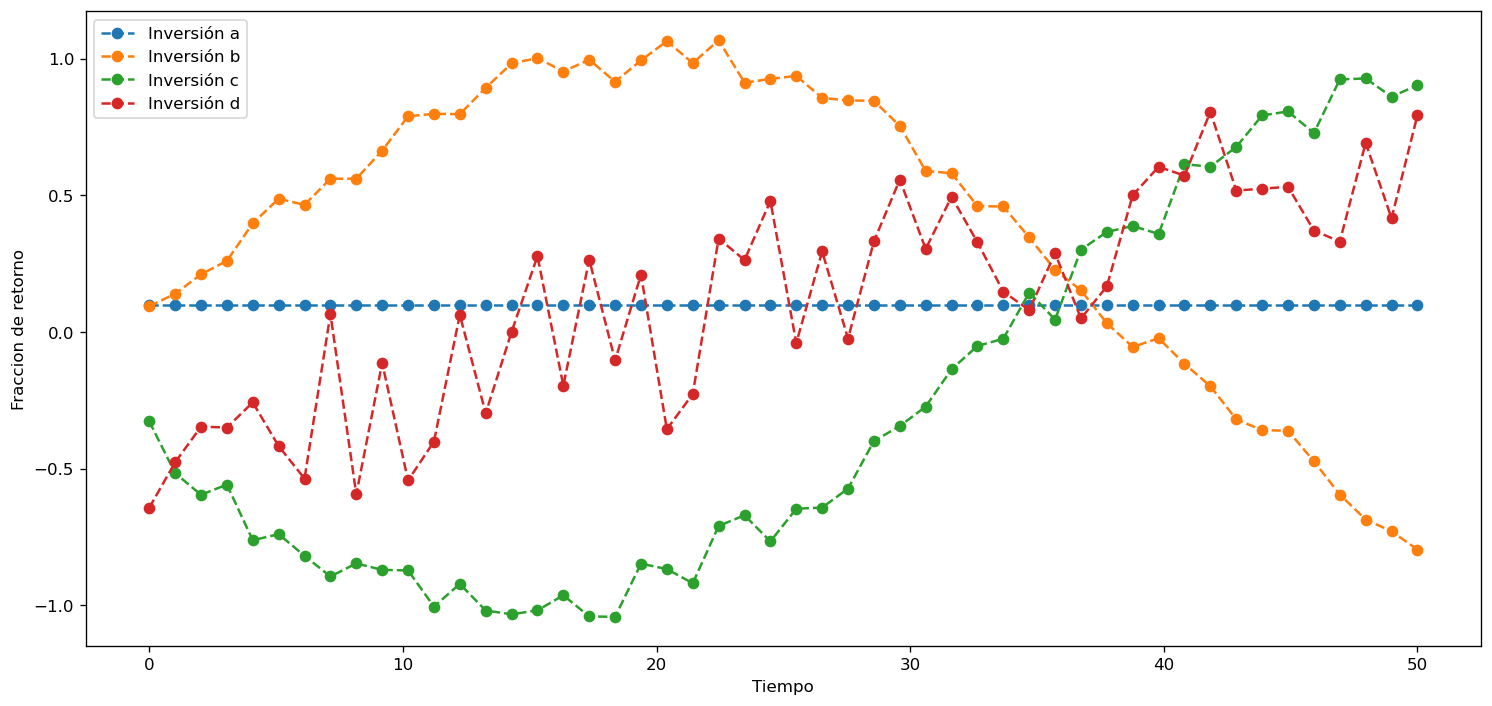

In [261]:
fig, ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
ax.plot(np.linspace(0,50,50),a, marker='o', linestyle='dashed',label='Inversión a')
ax.plot(np.linspace(0,50,50),b, marker='o', linestyle='dashed',label='Inversión b')
ax.plot(np.linspace(0,50,50),c, marker='o', linestyle='dashed',label='Inversión c')
ax.plot(np.linspace(0,50,50),d, marker='o', linestyle='dashed',label='Inversión d')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Fraccion de retorno')
ax.legend()
plt.show()

In [262]:
I = np.array([a,b,c,d])

In [263]:
M = np.array([np.mean(x) for x in I])
S = np.array([np.std(x) for x in I])

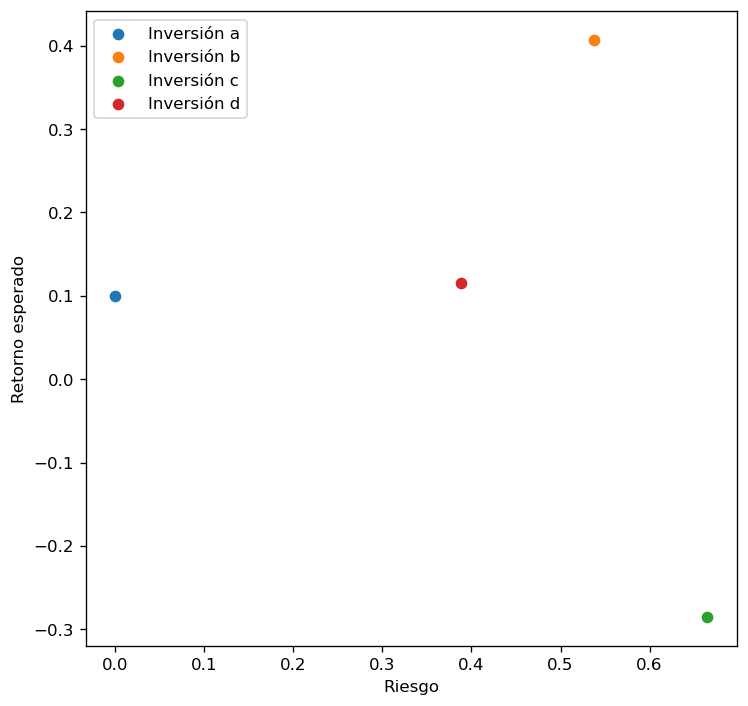

In [264]:
fig,ax  = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(S[0],M[0],label='Inversión a')
ax.scatter(S[1],M[1],label='Inversión b')
ax.scatter(S[2],M[2],label='Inversión c')
ax.scatter(S[3],M[3],label='Inversión d')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retorno esperado')
ax.legend()
plt.show()

## Estandarización

In [265]:
# az = (a - np.mean(a)) / np.std(a)
# bz = (b - np.mean(b)) / np.std(b)
# cz = (c - np.mean(c)) / np.std(c)
# dz = (d - np.mean(d)) / np.std(d)

In [266]:
from scipy import stats

az = stats.zscore(a)
bz = stats.zscore(b)
cz = stats.zscore(c)
dz = stats.zscore(d)

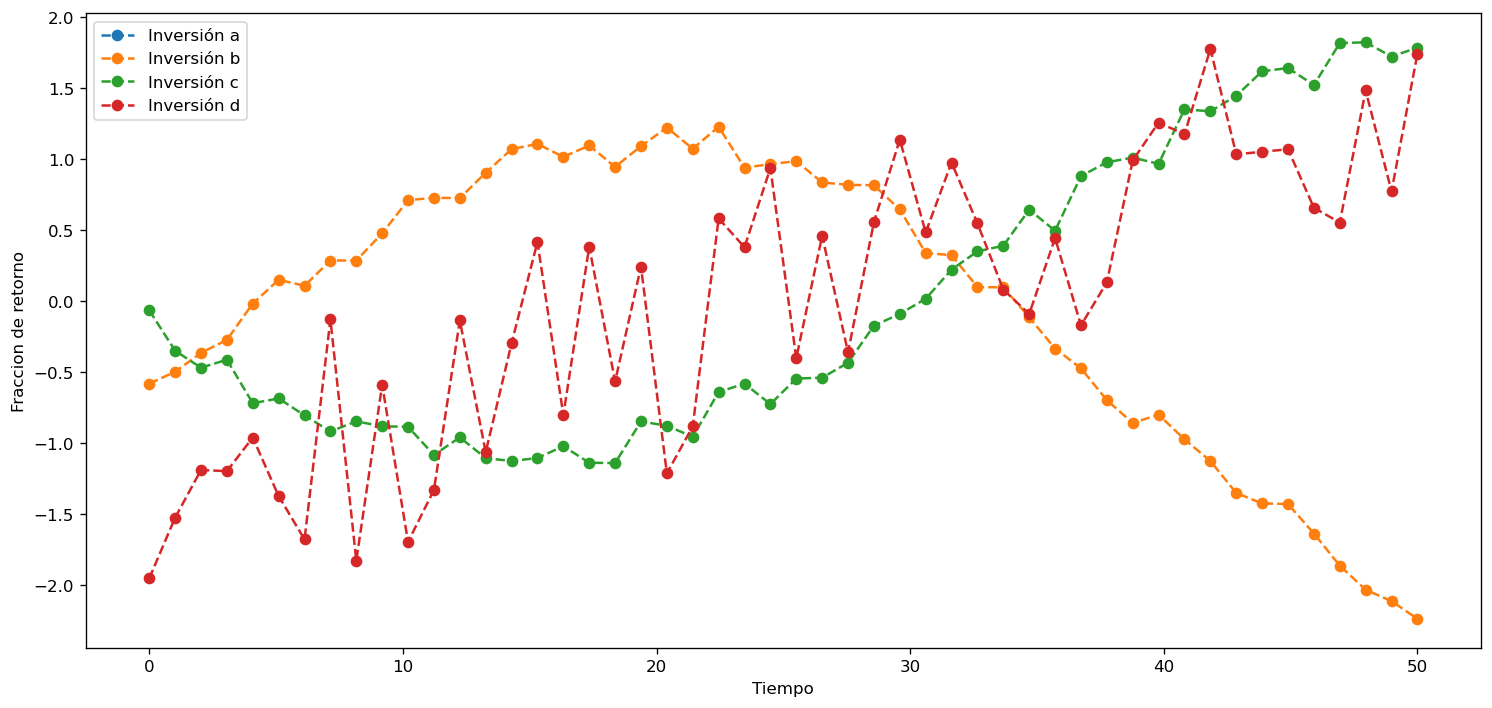

In [267]:
fig, ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
ax.plot(np.linspace(0,50,50),az, marker='o', linestyle='dashed',label='Inversión a')
ax.plot(np.linspace(0,50,50),bz, marker='o', linestyle='dashed',label='Inversión b')
ax.plot(np.linspace(0,50,50),cz, marker='o', linestyle='dashed',label='Inversión c')
ax.plot(np.linspace(0,50,50),dz, marker='o', linestyle='dashed',label='Inversión d')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Fraccion de retorno')
ax.legend()
plt.show()

In [268]:
I = np.array([az,bz,cz,dz])
M = np.array([np.mean(x) for x in I])
S = np.array([np.std(x) for x in I])

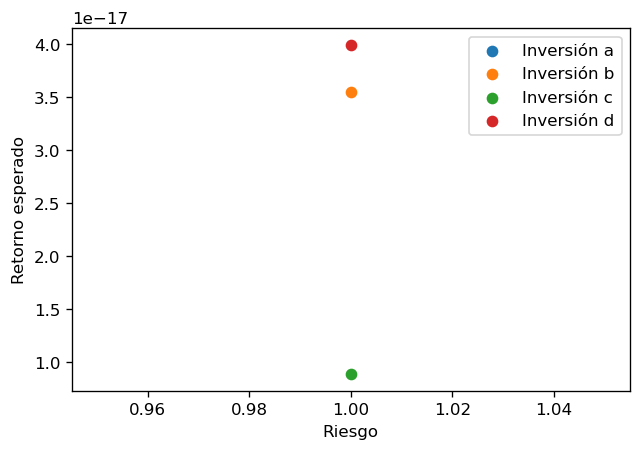

In [269]:
fig,ax  = plt.subplots(1,1,dpi=120)
ax.scatter(S[0],M[0],label='Inversión a')
ax.scatter(S[1],M[1],label='Inversión b')
ax.scatter(S[2],M[2],label='Inversión c')
ax.scatter(S[3],M[3],label='Inversión d')
ax.set_xlabel('Riesgo')
ax.set_ylabel('Retorno esperado')
ax.legend()
plt.show()

## Ángulos

In [270]:
def demean(a):
    # return a - np.mean(a) * np.array([1]*len(a))
    return a - np.mean(a)

In [271]:
def correlacion(a,b):
    a,b = demean(a), demean(b)
    return (a@b) / (np.linalg.norm(a)*np.linalg.norm(b))

In [277]:
a = np.sin(np.linspace(0,6,100)) + np.random.uniform(-0.4,0.4,100)
b = np.sin(np.linspace(0,6,100)) + np.random.uniform(-0.4,0.4,100)

In [278]:
print('La correlación entre a y b es',correlacion(a,b))

La correlación entre a y b es 0.8922532364734912


In [279]:
import pandas as pd 
d = {"a": a, "b":b}
df = pd.DataFrame(d)
df.corr()

,a,b
a,1.000000,0.892253
b,0.892253,1.000000


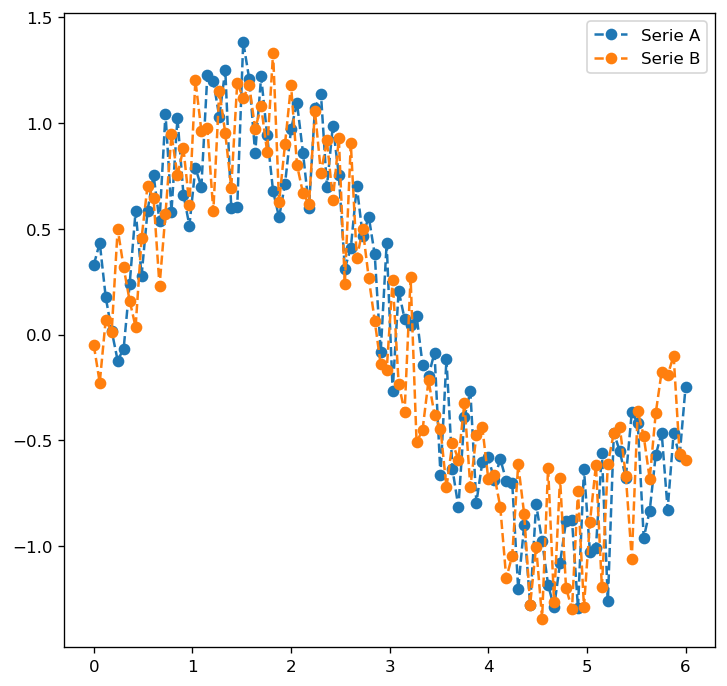

In [280]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

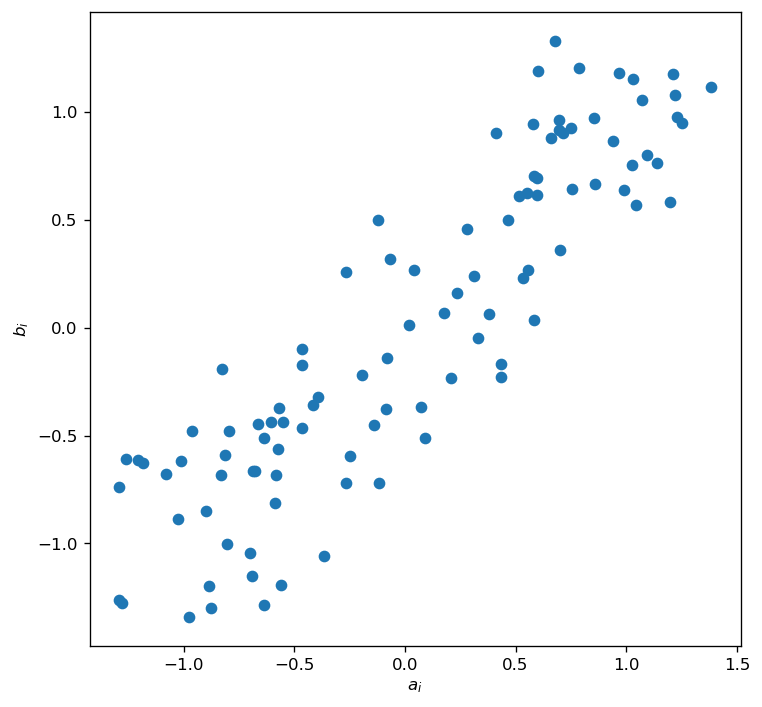

In [281]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()

In [282]:
a = np.sin(np.linspace(0,6,100)) + np.random.uniform(-0.4,0.4,100)
b = np.cos(np.linspace(2,7,100)) + np.random.uniform(-0.4,0.4,100)

In [283]:
print('La correlación entre a y b es',correlacion(a,b))

La correlación entre a y b es -0.8882543036290081


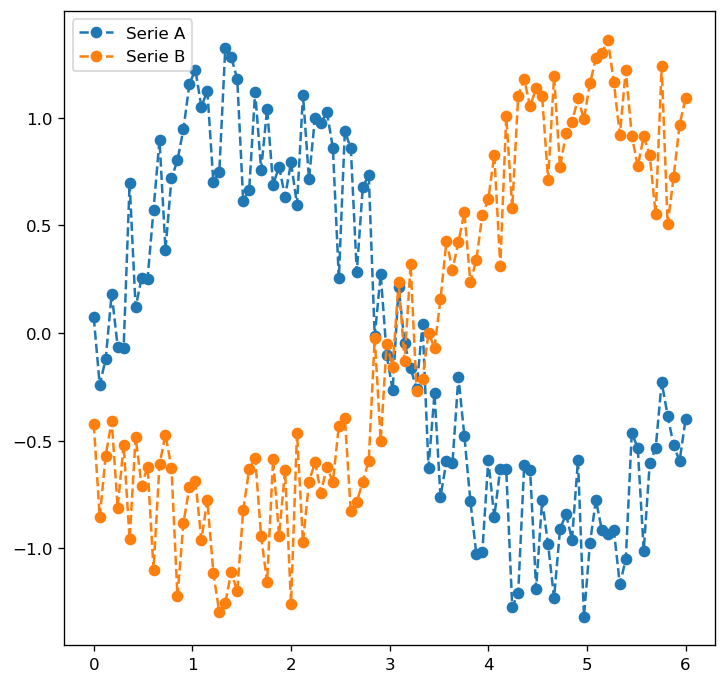

In [284]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

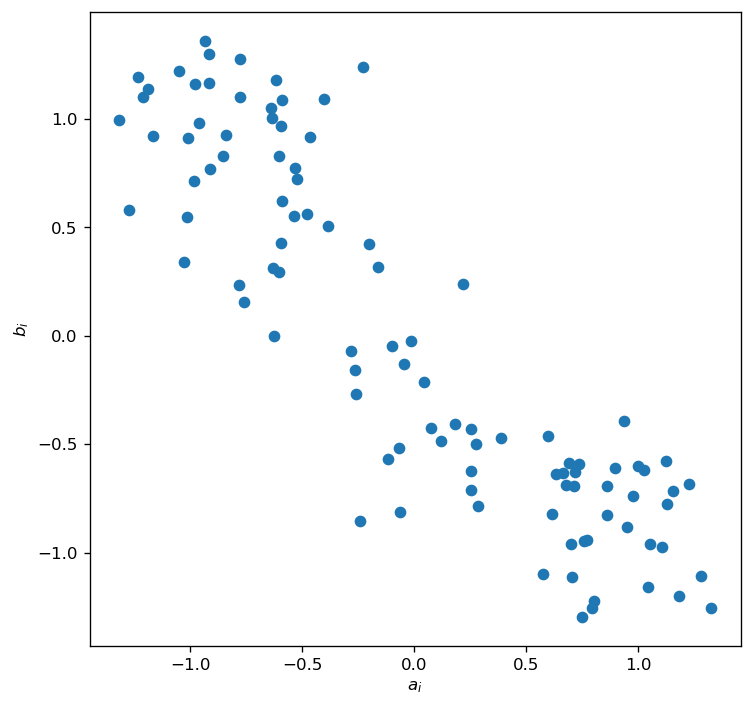

In [285]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()

In [286]:
a = np.cos(np.linspace(0,6,100)) + np.random.uniform(-0.4,0.4,100)
b = np.exp(np.linspace(2,7,100)) + np.random.uniform(-0.4,0.4,100)

In [287]:
print('La correlación entre a y b es',correlacion(a,b))

La correlación entre a y b es 0.3015792877662956


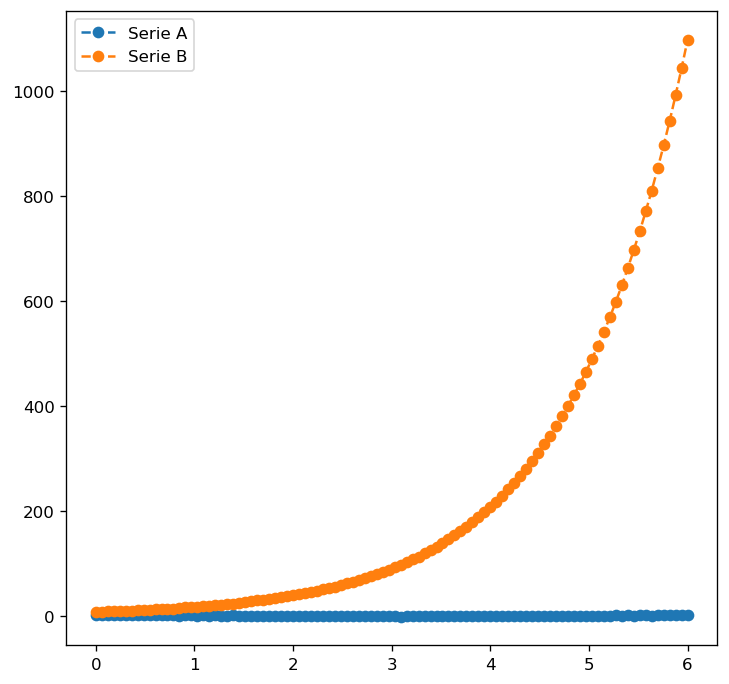

In [288]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(np.linspace(0,6,100),a, label = 'Serie A', marker='o', linestyle='dashed')
ax.plot(np.linspace(0,6,100),b, label = 'Serie B', marker='o', linestyle='dashed')
ax.legend()
plt.show()

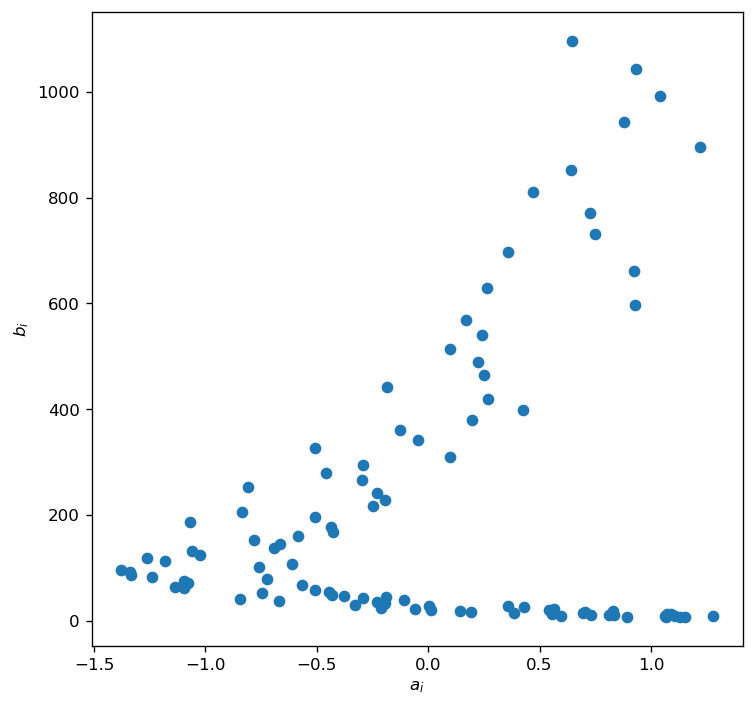

In [289]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.scatter(a,b)
ax.set_xlabel(r'$a_{i}$')
ax.set_ylabel(r'$b_{i}$')
plt.show()